In [2]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

In [3]:
instances = []
instance = {}

type = "gallagher 101 peaks/gallagher 101 peaks"
name = "Borg Adaptative"

# Read the data
with open("./Data/bbob-biobj_f55_d02_hyp.tdat", "r") as file:
    for line in file:
        if line[0] == "%" and instance:
            instances.append(instance)
            instance = {}
        if line[0] == "%":
            continue
        line = line.split()
        instance[int(line[0])] = float(line[1])
    instances.append(instance)

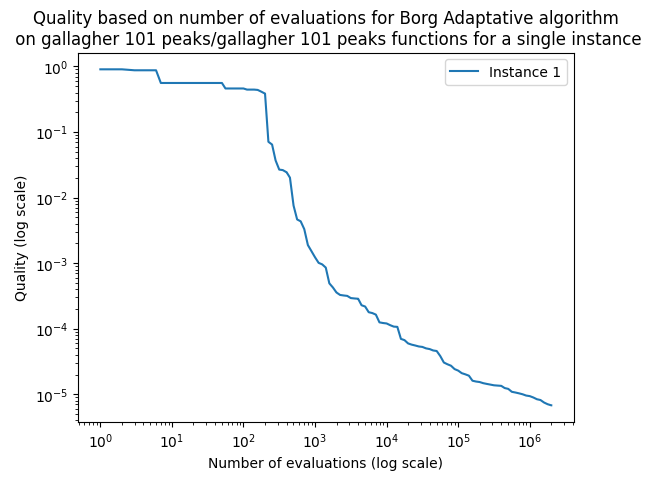

In [4]:
# Plot one instance
fig, ax = plt.subplots()
ax.set_title("Quality based on number of evaluations for " + name + " algorithm\n on " + type + " functions for a single instance")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(instances[0].keys()), list(instances[0].values()), label=f"Instance 1")
ax.plot()
ax.legend()
plt.show()

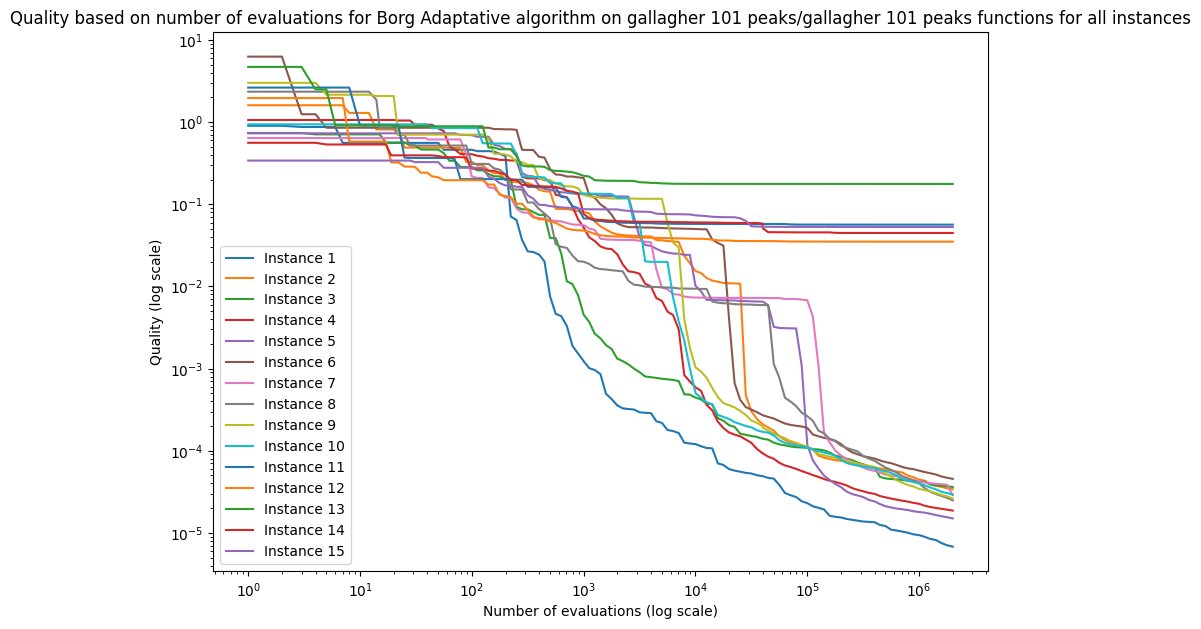

In [5]:
# Plot the data
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.set_title("Quality based on number of evaluations for " + name + " algorithm on " + type + " functions for all instances")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
for i, instance in enumerate(instances):
    ax.plot(list(instance.keys()), list(instance.values()), label=f"Instance {i+1}")
ax.plot()
ax.legend(loc='lower left')
plt.show()

In [6]:
# convert to numpy
for i, instance in enumerate(instances):
    instances[i] = np.array(list(instance.items()))

In [7]:
# Do the median
median = {}
for instance in instances:
    for x, y in instance:
        if x not in median:
            median[x] = []
        median[x].append(y)
for x in median:
    median[x] = np.median(median[x])

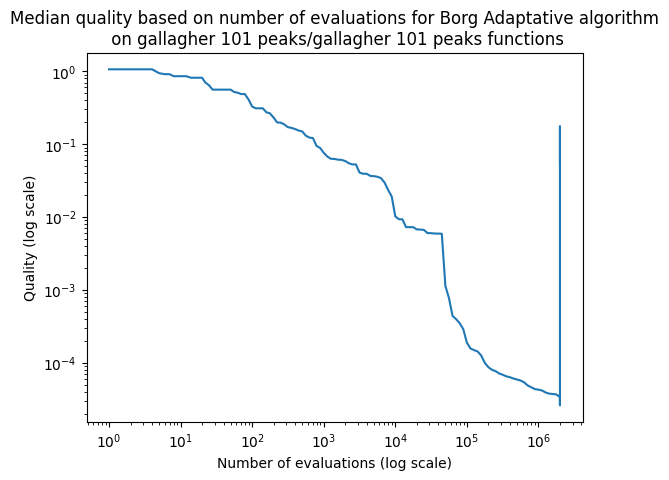

{1.0: 1.063227477216144, 2.0: 1.063227477216144, 3.0: 1.063227477216144, 4.0: 1.063227477216144, 5.0: 0.941415123301142, 6.0: 0.9122929614495049, 7.0: 0.9122929614495049, 8.0: 0.8557795715975405, 10.0: 0.8557795715975405, 11.0: 0.8557795715975405, 12.0: 0.8557795715975405, 14.0: 0.8146916191228555, 15.0: 0.8146916191228555, 17.0: 0.8146916191228555, 19.0: 0.8146916191228555, 20.0: 0.8146916191228555, 22.0: 0.7055366878320359, 25.0: 0.6407650326628276, 28.0: 0.559681998144675, 31.0: 0.559681998144675, 35.0: 0.559681998144675, 39.0: 0.559681998144675, 40.0: 0.559681998144675, 44.0: 0.559681998144675, 50.0: 0.559681998144675, 56.0: 0.5196032864430191, 63.0: 0.5072593538633223, 70.0: 0.4866677870938454, 79.0: 0.4866677870938454, 89.0: 0.4096919947230079, 100.0: 0.3281741065342443, 112.0: 0.3103350639534623, 125.0: 0.3103350639534623, 141.0: 0.3103350639534623, 158.0: 0.273793839231236, 177.0: 0.2649762593149634, 199.0: 0.2313620254597797, 200.0: 0.2313620254597797, 223.0: 0.198710822586977

In [8]:
# Plot the medians
fig, ax = plt.subplots()
ax.set_title("Median quality based on number of evaluations for " + name + " algorithm\n on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(median.keys()), list(median.values()), label="Median")
plt.show()
print(median)

In [29]:
# Ecart type
std = {}
for instance in instances:
    for x, y in instance:
        if x not in std:
            std[x] = []
        std[x].append(y)
for x in std:
    std[x] = np.var(std[x])

ecartSup = {}
ecartInf = {}
for x in median:
    ecartSup[x] = (median[x] + np.sqrt(std[x]))
    ecartInf[x] = (median[x] - np.sqrt(std[x]))
    
print(ecartInf)
print(ecartSup)
print(median)
print(std)

{1.0: -0.5761494832378184, 2.0: -0.5761494832378184, 3.0: -0.08778793643830718, 4.0: 0.22382143870399596, 5.0: 0.1761039822508077, 6.0: 0.20963612945051513, 7.0: 0.19503864565949935, 8.0: 0.16460067617500063, 10.0: 0.30229516686832214, 11.0: 0.30229516686832214, 12.0: 0.30229516686832214, 14.0: 0.35479316249156684, 15.0: 0.43411516365258346, 17.0: 0.4292824413352963, 19.0: 0.40556687532514163, 20.0: 0.40590749466342324, 22.0: 0.4886492891227795, 25.0: 0.41512891348636505, 28.0: 0.3317242407092514, 31.0: 0.34341938600939204, 35.0: 0.33699172347249, 39.0: 0.33694164942660715, 40.0: 0.3371282207620131, 44.0: 0.34292229630953397, 50.0: 0.3501717994068191, 56.0: 0.303528237496938, 63.0: 0.29390211421456536, 70.0: 0.27204138667871536, 79.0: 0.2569056559917654, 89.0: 0.17539457474048956, 100.0: 0.07727666799166849, 112.0: 0.05786936956677552, 125.0: 0.07840016831346255, 141.0: 0.1066700485161475, 158.0: 0.09420526635223617, 177.0: 0.08158937186348206, 199.0: 0.046055926630824306, 200.0: 0.046

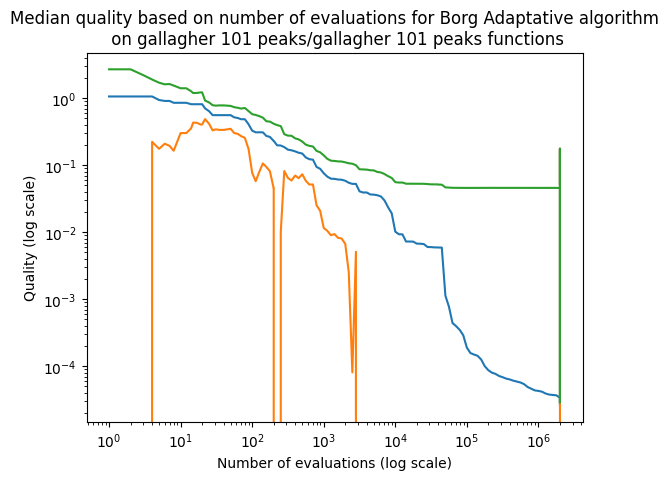

{1.0: 1.063227477216144, 2.0: 1.063227477216144, 3.0: 1.063227477216144, 4.0: 1.063227477216144, 5.0: 0.941415123301142, 6.0: 0.9122929614495049, 7.0: 0.9122929614495049, 8.0: 0.8557795715975405, 10.0: 0.8557795715975405, 11.0: 0.8557795715975405, 12.0: 0.8557795715975405, 14.0: 0.8146916191228555, 15.0: 0.8146916191228555, 17.0: 0.8146916191228555, 19.0: 0.8146916191228555, 20.0: 0.8146916191228555, 22.0: 0.7055366878320359, 25.0: 0.6407650326628276, 28.0: 0.559681998144675, 31.0: 0.559681998144675, 35.0: 0.559681998144675, 39.0: 0.559681998144675, 40.0: 0.559681998144675, 44.0: 0.559681998144675, 50.0: 0.559681998144675, 56.0: 0.5196032864430191, 63.0: 0.5072593538633223, 70.0: 0.4866677870938454, 79.0: 0.4866677870938454, 89.0: 0.4096919947230079, 100.0: 0.3281741065342443, 112.0: 0.3103350639534623, 125.0: 0.3103350639534623, 141.0: 0.3103350639534623, 158.0: 0.273793839231236, 177.0: 0.2649762593149634, 199.0: 0.2313620254597797, 200.0: 0.2313620254597797, 223.0: 0.198710822586977

In [30]:
fig, ax = plt.subplots()
ax.set_title("Median quality based on number of evaluations for " + name + " algorithm\n on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(median.keys()), list(median.values()), label="Median")
ax.plot(list(ecartInf.keys()), list(ecartInf.values()), label="Ecart inférieur")
ax.plot(list(ecartSup.keys()), list(ecartSup.values()), label="Ecart supérieur")
plt.show()
print(median)

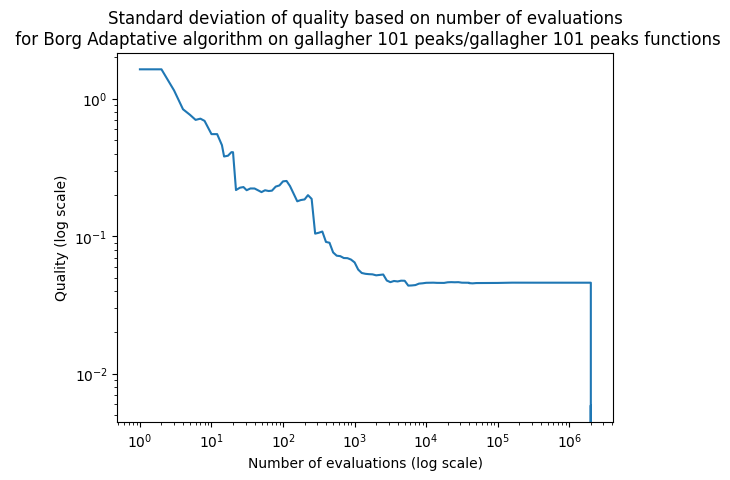

In [11]:
# Plot the standard deviation
fig, ax = plt.subplots()
ax.set_title("Standard deviation of quality based on number of evaluations\n for " + name + " algorithm on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(list(std.keys()), list(std.values()), label="Standard deviation")
plt.show()

In [12]:
# ECDF
sample = np.hstack(instances)
ecdf = ECDF(sample[:, 1])

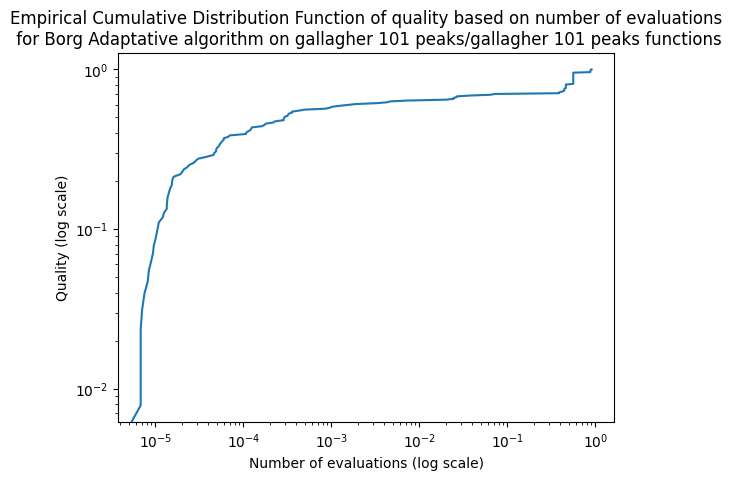

In [13]:
# Plot the ECDF
fig, ax = plt.subplots()
ax.set_title("Empirical Cumulative Distribution Function of quality based on number of evaluations\n for " + name + " algorithm on " + type + " functions")
ax.set_xlabel("Number of evaluations (log scale)")
ax.set_ylabel("Quality (log scale)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(ecdf.x, ecdf.y, label="ECDF")
plt.show()